# This notebook plots the disk usage of both platforms
## Minerva disk usage is manually calculated via linux platform commands
## Hadoop HDFS disk usage is derived from HDFS ls command
### @require:  hdfs_disk_usage folder

In [1]:
import pandas as pd

In [2]:
##### Manually calculated Minerva disk usage
dns =['pf1','pf2','pf3','elegans','pacificus','remanei','drosophila','thaliana']
# intermediate file usage = (all disk usage) - (raw data usage)
sizes = [54-7.4,54-7.4,53-7.4,493.6-107,738.4-169,729-170,746.6-171,760.4-171]
out_dfs = pd.DataFrame(index=range(len(dns)))
out_dfs['data']=dns
out_dfs['disk usage'] = sizes
out_dfs['#processors'] = 24
out_dfs['platform']='Minerva'
dfs =[out_dfs]
#### Automatically get the disk usage of HDFS
for dn in dns:
    for n in [1,2,4,8,16,24]:
        fn = 'final_results/hdfs_disk_usage/%s_n%d_disk_usage.txt' %(dn,n)
        df = pd.read_table(fn,sep=r"\s*",header=None)
        usage = df[4].sum()/1000000.0 # byte to megabyte
        out_df = pd.DataFrame(data=[[dn,n,usage,'Spark']],columns=['data','#processors','disk usage','platform'],index=[0])
        dfs.append(out_df)   
dfs = pd.concat(dfs)
dfs['disk usage'] = dfs['disk usage']/1000.0 # megabyte to gigabyte

/Users/wangl35/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

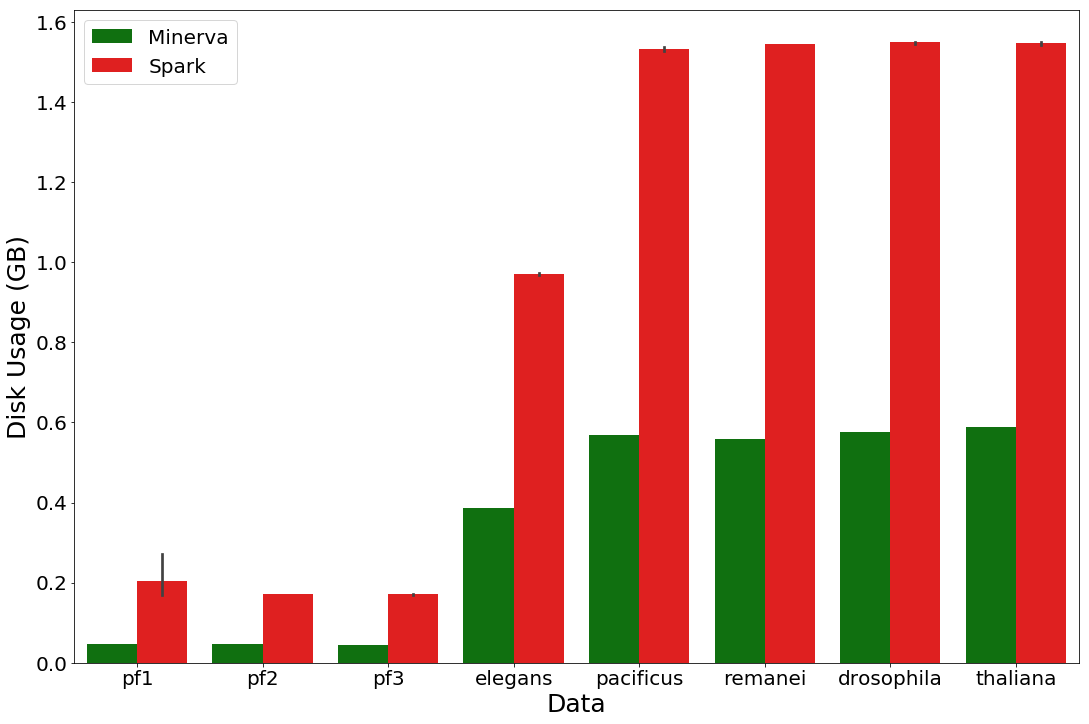

In [5]:
# sns.set(style="whitegrid")
fig = plt.figure(figsize=(18,12))
f = sns.barplot(data=dfs,y='disk usage',hue_order=['Minerva','Spark'],x='data',hue='platform',palette=['green','red'])
plt.xlabel('Data',fontsize=25)
plt.ylabel('Disk Usage (GB)',fontsize=25)
plt.tick_params(axis='both',labelsize=20)
plt.legend(fontsize=20)
plt.savefig('disk_usage_barplot.png',bbox_inches='tight')
plt.show()
plt.close()